In [5]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [ ]:
# remapping da aggiustare in caso
REMAPPING = {
    7: 0,                  # road
    8: 1,                  # sidewalk
    11: 2,                 # building
    12: 3, 13: 3,          # wall, fence
    17: 4, 19: 4, 20: 4,   # pole, sign, light
    21: 5,                 # vegetation
    22: 6,                 # terrain
    23: 7,                 # sky
    24: 8, 25: 8,          # person, rider
    26: 9,                 # car
    27: 10, 28: 10,        # truck, bus
    31: 11,                # train
    32: 12, 33: 12         # motorcycle, bicycle
}
BACKGROUND_CLASS = 13
OBJECT_CLASSES = [24, 25, 26, 27, 28, 31, 32, 33] # da espandere??

In [6]:
# per fare remapping + object class
def process_label_image(labelIds_path):
    label_ids = np.array(Image.open(labelIds_path))
    h, w = label_ids.shape

    remapped_mask = np.full((h, w), fill_value=BACKGROUND_CLASS, dtype=np.uint8)
    object_mask = np.zeros((h, w), dtype=np.uint8)

    for orig_id, new_id in REMAPPING.items():
        remapped_mask[label_ids == orig_id] = new_id

    for obj_id in OBJECT_CLASSES:
        object_mask[label_ids == obj_id] = 1

    return remapped_mask, object_mask

# per fare one hot encoding delle classi rimappate
def one_hot_encode_mask(remapped_mask, num_classes=14):
    h, w = remapped_mask.shape
    one_hot = np.zeros((num_classes, h, w), dtype=np.uint8)
    for class_id in range(num_classes):
        one_hot[class_id] = (remapped_mask == class_id).astype(np.uint8)
    return one_hot

def save_masks(remapped_mask, object_mask, out_dir, base_name):
    os.makedirs(out_dir, exist_ok=True)
    Image.fromarray(remapped_mask).save(os.path.join(out_dir, f"{base_name}_remapped16.png"))
    Image.fromarray(object_mask * 255).save(os.path.join(out_dir, f"{base_name}_object_mask.png"))

In [ ]:
input_path = "../gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png"
remapped_mask, object_mask = process_label_image(input_path)

save_masks(remapped_mask, object_mask, "../masks", "aachen_000000_000019")
print("remapping saved.")

# one_hot dobbiamo usarlo poi per la semantic segmentation network credo aggiungendo anche l'object class presa sopra
one_hot = one_hot_encode_mask(remapped_mask, num_classes=14)

remapping saved.


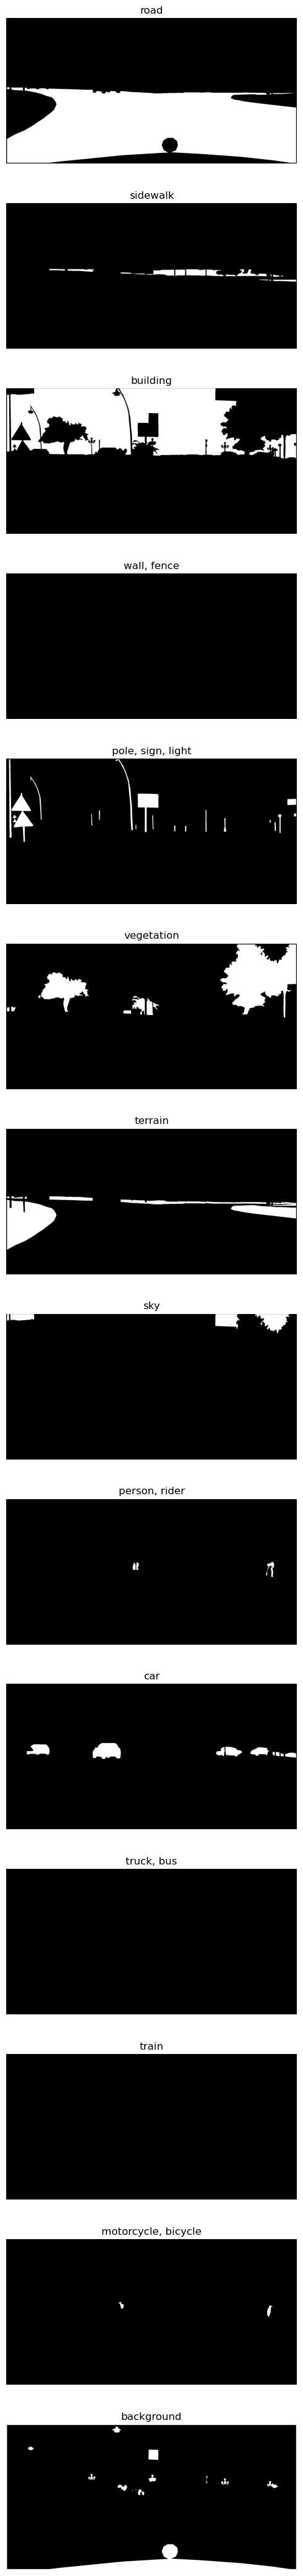

In [9]:
class_names = ["road", "sidewalk", "building", "wall, fence", "pole, sign, light", "vegetation",
               "terrain", "sky", "person, rider", "car", "truck, bus", "train", "motorcycle, bicycle", "background"]

def visualize_one_hot_vertical(one_hot, class_names=None, max_classes=14):
    num_classes = min(one_hot.shape[0], max_classes)
    fig, axes = plt.subplots(num_classes, 1, figsize=(5, 3 * num_classes))

    for i in range(num_classes):
        ax = axes[i]
        ax.imshow(one_hot[i], cmap='gray')
        title = f"Class {i}" if class_names is None else class_names[i]
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

visualize_one_hot_vertical(one_hot, class_names)